<a href="https://colab.research.google.com/github/Swaghanaian/Food-Sales-Predictions/blob/main/Food_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
filename = '/content/sales_predictions.csv'
df = pd.read_csv('/content/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [34]:
#To find how many rows and columns
df.info()

#Tells us we have 8523 rows and 12 columns

#The output also tells us that there are 4 columns with the dtype float64, 1 column with the dtype int64 and 7 columns with the dtype object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Making a copy of dataframe for Machine Learning model**

In [35]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [36]:
df_ml = df.copy()

In [37]:
#Check missing values
df_ml.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [38]:
#check for duplicates
df_ml.duplicated().sum()

0

**To visualize the correlation between price and other columns**

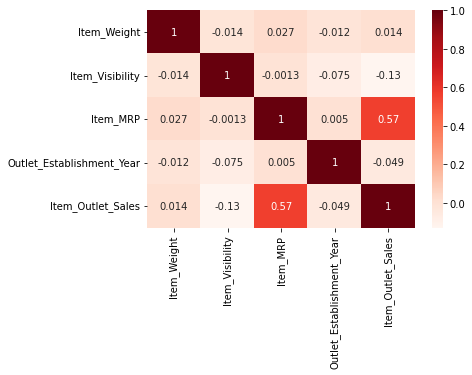

In [39]:
import seaborn as sns
corr=df_ml.corr()
sns.heatmap(corr, cmap = 'Reds', annot = True)

Strong correlation between Item MRP and Outlet Sales

**To Define features (X) and target (y). Where y is the Item Outlet Sales Column**

In [40]:
target = df_ml['Item_Outlet_Sales']
X = df_ml.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'], axis=1)
y = target

To Train/test split the data. Using use the random number 42 for consistency.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
X_train.shape

(6392, 8)

In [42]:
## Checking Datatypes 

display(X_train.info())
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           5285 non-null   float64
 1   Item_Fat_Content      6392 non-null   object 
 2   Item_Visibility       6392 non-null   float64
 3   Item_Type             6392 non-null   object 
 4   Item_MRP              6392 non-null   float64
 5   Outlet_Size           4580 non-null   object 
 6   Outlet_Location_Type  6392 non-null   object 
 7   Outlet_Type           6392 non-null   object 
dtypes: float64(3), object(5)
memory usage: 449.4+ KB


None

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,Low Fat,0.029565,Household,256.4646,Medium,Tier 3,Supermarket Type2
7510,15.250,Regular,0.000000,Snack Foods,179.7660,Medium,Tier 3,Supermarket Type2
5828,12.350,Regular,0.158716,Meat,157.2946,Medium,Tier 1,Supermarket Type1
5327,7.975,Low Fat,0.014628,Baking Goods,82.3250,Small,Tier 2,Supermarket Type1
4810,19.350,Low Fat,0.016645,Frozen Foods,120.9098,NaN,Tier 2,Supermarket Type1


**To Identify each feature as numerical, ordinal, or nominal based on the dataframe info above**.

Numerical - Item_Weight, Item_Visibility, Item_MRP, 

Ordinal - Outlet_Size

Nominal/Categorical - Item_Fat_Content, Item_Type, Outlet_Location_Type, Outlet_Type

**To Import and Instantiate model**

In [43]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

**To create the modeling pipeline**

In [44]:
from sklearn.pipeline import make_pipeline
reg_pipe = make_pipeline(scaler, reg)

**To Instantiate Column Selectors**

In [45]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

To Use pipelines and column transformers to impute missing values Using the mean and most frequent strategy

In [46]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

To Use One-Hot Encoder for the Nominal Features

In [47]:
# Scaler
scaler = StandardScaler()

To Use the StandardScaler to scale the Numeric Columns

In [48]:
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

**To Use the ‘mean’ strategy for numeric columns to impute missing values**

In [49]:
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

**To Use the ‘most frequent’ strategy for categorical columns to impute missing values**

In [50]:
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

**To Instantiate Column Transformer**

In [51]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fef0297e190>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fef0297e250>)])

**To Transform Data using transformer data on test and training datasets**

In [52]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fef0297e190>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fef0297e250>)])

In [53]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

**To Inspect the Result and View Results**

In [54]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 34)




array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

In [55]:
#To show all pipelines
preprocessor.named_transformers_

{'pipeline-1': Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 'pipeline-2': Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse=False))])}

In [56]:
#Extraction col names from Num selector
Final_Feature=num_selector(X_train)
Final_Feature

['Item_Weight', 'Item_Visibility', 'Item_MRP']

In [57]:
preprocessor.named_transformers_

{'pipeline-1': Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 'pipeline-2': Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse=False))])}

In [58]:
## what is in named-steps
categorical_pipe.named_steps


{'onehotencoder': OneHotEncoder(handle_unknown='ignore', sparse=False),
 'simpleimputer': SimpleImputer(strategy='most_frequent')}

In [59]:
#To change from array to dataframe
df_ml_1 = pd.DataFrame(X_train_processed)
df_ml_1

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.817249,-0.712775,1.828109,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.556340,-1.291052,0.603369,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.131512,1.813319,0.244541,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.169219,-1.004931,-0.952591,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.528819,-0.965484,-0.336460,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,-0.832409,4.309657,-0.044657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6388,0.639356,1.008625,-1.058907,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6389,1.113736,-0.920527,1.523027,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6390,1.766009,-0.227755,-0.383777,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


**To run the first model**

In [60]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [61]:
# Make and fit a linear regression model
reg_pipe = make_pipeline(preprocessor, reg)

reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fef0297e190>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fef0297e250>)])),
                ('linearregression', LinearRegression())])

# To evaluate Metrics

In [62]:
from sklearn.metrics import r2_score, mean_squared_error

**To measure performance based on R^2**

In [63]:
## Measuring model performance - using builtin .score()
print(f"Train R-Squared: { round( reg_pipe.score(X_train, y_train),3) }")
print(f"Test R-Squared: { round( reg_pipe.score(X_test, y_test),3) }")

Train R-Squared: 0.561
Test R-Squared: 0.565


**To measure performance based on RMSE**

In [64]:
# get predictions for train and test data
y_hat_train = reg_pipe.predict(X_train)
y_hat_test = reg_pipe.predict(X_test)

In [65]:
# Get RMSE for train vs test
rmse_train =  mean_squared_error(y_train, y_hat_train, squared=False)
rmse_test = mean_squared_error(y_test, y_hat_test, squared=False)
print(f"Train RMSE: { round(rmse_train, 2)}")
print(f"Test RMSE: { round( rmse_test, 2)}")

Train RMSE: 1140.18
Test RMSE: 1094.93


# **To build a simpler regression model**

In [66]:
from sklearn.tree import DecisionTreeRegressor

**To instantiate model and fit model on training set**

In [67]:
#To instantiate 
#Using the decision tree
dec_tree = DecisionTreeRegressor(random_state = 42)

In [68]:
#To fit model on training set
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

**To predict the target values for Oulet Sales**

In [69]:
train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_test_processed)

**To evaluate the Model**

In [70]:
# evaluate the model
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

1.0
0.13110528507769081


**To Tune the model for optimized results**

In [71]:
# Looking at options for tuning this model
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [72]:
# To find the depth of the model
dec_tree.get_depth()

41

In [73]:
#To find how many leaf nodes exist in the model
dec_tree.get_n_leaves()

6260

To use the For Loop to get a list of values for max_depth

In [74]:
# List of values to try for max_depth:
depths = list(range(2, 42)) # will try every value between 2 and 36
# Data frame to store the score for each value of max_depth:
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train_processed, y_train)
    train_score = dec_tree.score(X_train_processed, y_train)
    test_score = dec_tree.score(X_test_processed, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

**To visualize max_depth values**

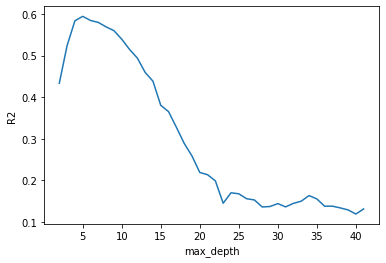

In [75]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

The graph tells us that the max depth for optimum results for this model is 5

In [76]:
#To verify that Depth of 5 has the highest scores.
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
5,0.59472,0.603932
6,0.584789,0.615139
4,0.584005,0.582625
7,0.580072,0.626772
8,0.569332,0.642711


To Run model with the optimized depth of 5

In [77]:
# To run the model with the optimized value for max_depth
dec_tree_6 = DecisionTreeRegressor(max_depth = 6, random_state = 42)
dec_tree_6.fit(X_train_processed, y_train)
train_6_preds = dec_tree_6.predict(X_train_processed)
test_6_preds = dec_tree_6.predict(X_test_processed)
train_6_score = dec_tree_6.score(X_train_processed, y_train)
test_6_score = dec_tree_6.score(X_test_processed, y_test)
print(train_6_score)
print(test_6_score)

0.6151391922642702
0.584789307817742


Test output is not far off from the training output

**To compare the performance model based on R^2 and RMSE**

In [78]:
#Using eval regression function to calculate R^2 and RMSE
def eval_regression(true, pred):
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'RMSE: {rmse},\n R^2: {r2} ')

In [79]:
eval_regression(y_train,dec_tree_6.predict(X_train_processed))
eval_regression(y_test,dec_tree_6.predict(X_test_processed))

RMSE: 1067.2293628373448,
 R^2: 0.6151391922642702 
RMSE: 1070.3069042967677,
 R^2: 0.584789307817742 


**Summary**

With the evaluation of bothe the Decision Trees model and the linear regression model, the Decision tree is my recommended model. The justification is that the output for the R^2 training has higher values than the Linear regression model. The RMSE for the Decision Tree model is less than the Linear regression meaning there are going to me lower erroneous predictions than the Linear regression model.

# The code below is not part of the Final Project

# **The below code is not part of Machine Learning**

In [80]:
# To Check for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [81]:
# Count the duplicates
df.duplicated().sum()

#The output shows there are no duplicates

0

In [82]:
#To identify missing values

df.isna().sum()

#Output shows 1463 values missing in Item_Weight column and 2410 values missing in Outlet_Size column

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [83]:
#These missing values may be material and since I am not an expert I will use my judgment to replace missing values with the word 'Missing' in the Outlet_Size column.

#To replace missing values with the word 'Missing'
df['Outlet_Size'].fillna('Missing', inplace=True)

#Verifying change for Outlet_Size column was successful and there are no missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [84]:
#I will also use my judgment to replace missing values in the Item_Weight column with the average of the Item_Weight column.
mean_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(mean_weight, inplace=True)

#Verifying change for Outlet_Size column was successful and there are no missing values
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [85]:
# Check the unique values and counts of the 'Item_Fat_Content' column
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [86]:
# Fixing inconsistent categories of data LF to Low Fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'].value_counts()



Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [87]:
# Fixing inconsistent categories of data low fat to Low Fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'].value_counts()


Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [88]:
# Fixing inconsistent categories of data reg to Regular
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [89]:
#To show summary statistics for each column, limiting to 2 decimal places

df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


**To plot a univariate graph showing the Item Weight distribution**

Text(0, 0.5, 'Count')

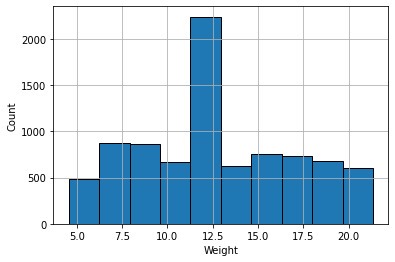

In [90]:
# To plot a histogram of the of Item Weight

import matplotlib.pyplot as plt

df['Item_Weight'].hist(edgecolor = 'black');
plt.xlabel('Weight');
plt.ylabel('Count')

The histogram tells us that the Items that have a weight of 12.5 are the highest percentage of the total count

**To plot 2 different multivariate graphs showing the relationship between some of the columns(Outlet Type, Outlet Sales & MRP)**

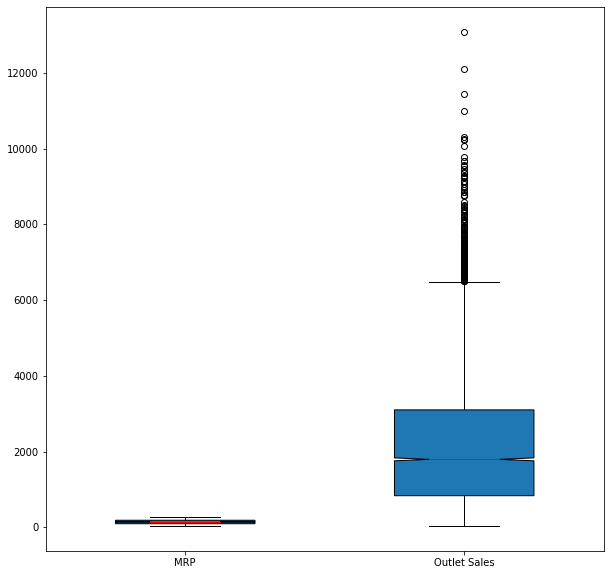

In [91]:
from IPython.core.pylabtools import figsize
mrp= df['Item_MRP']
sales = df['Item_Outlet_Sales']
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(10,10) )
boxplots = axes.boxplot([mrp, sales], notch= True,labels = ['MRP','Outlet Sales'],
             widths = .5,
             patch_artist = True,
             medianprops = dict(linestyle = '-',linewidth = 1, color = 'red'),
             boxprops = dict(linestyle = '--', linewidth = 1, color = 'black'));



This boxplot shows that the different outlet types buy products at a very low cost and sell for High margins

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

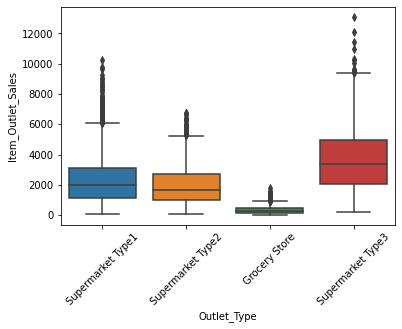

In [92]:
#To plot a boxplot graph of Outlet Type and Item Outlet Sales
import seaborn as sns
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.xticks(rotation = 45)

The boxplot graph of Outlet Type and Item Outlet Sales shows that each of the Supermarket Outlet Types have greater sales than the Grocery Store.

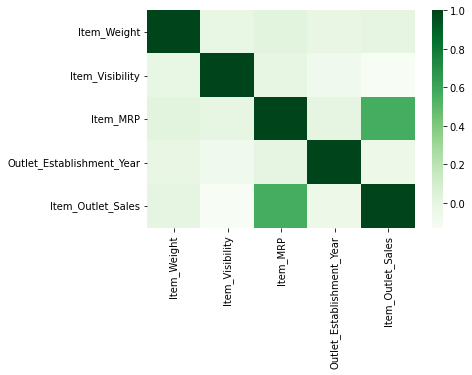

In [93]:
#To plot a heatmap correlation between features.
import seaborn as sns
corr=df.corr()
sns.heatmap(corr, cmap = 'Greens')

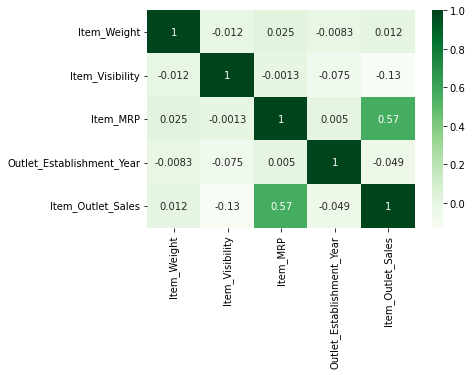

In [94]:
#Example 2 for Heatmap
sns.heatmap(corr, cmap = 'Greens', annot = True)

This heat map tells us that there is a moderate correlation between Item Outlet Sales and Item MRP

**To create two more visualizations to show the distribution of Outlet Sales per Outlet Type**

In [95]:
#Just creating a variable to summarize the visualization I am creating
Sales_per_outlet_type = df.groupby(['Outlet_Type'])['Item_Outlet_Sales']

In [96]:
Sales_per_outlet_type.describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Type,,,,,,,,
Grocery Store,1083.0,339.828500,260.851582,33.2900,153.79980,256.9988,458.73620,1775.6886
Supermarket Type1,5577.0,2316.181148,1515.965558,73.2380,1151.16820,1990.7420,3135.91800,10256.6490
Supermarket Type2,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228
Supermarket Type3,935.0,3694.038558,2127.760054,241.6854,2044.33890,3364.9532,4975.52340,13086.9648


In [97]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

## **The first visualization will be a line plot using Matplotlib**

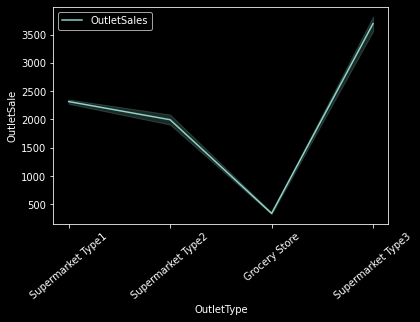

In [98]:
from traitlets.traitlets import Type
plt.style.use('dark_background')
sns.lineplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df,label=f'OutletSales')
plt.xlabel('OutletType')
plt.ylabel('OutletSale')
plt.xticks(rotation=40)
plt.legend()

The visualization above shows that the Grocery Store has the least amount of sales and the Supermarket type 3 has the most Sales.

## **The second visualization will be a bar graph using Matplotlib**

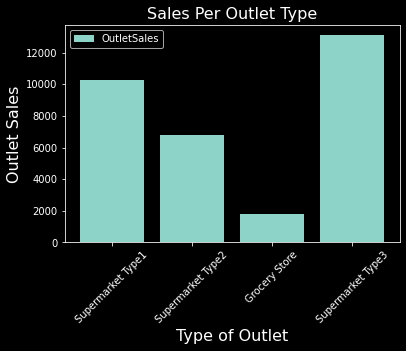

In [99]:
plt.bar('Outlet_Type', 'Item_Outlet_Sales',data=df, label='OutletSales')
plt.style.use('seaborn-pastel')
plt.xlabel('Type of Outlet', fontsize = 16)
plt.ylabel('Outlet Sales', fontsize = 16)
plt.title('Sales Per Outlet Type', fontsize = 16)
plt.xticks(rotation=45)
plt.legend()

This visualization above also shows that the Grocery Store has the least amount of sales and the Supermarket type 3 has the most Sales. In my opinion, this graph is easier to read and understand. Tried out the pastel chart style to see how it is.